<a href="https://colab.research.google.com/github/Yeen000/Aiffel/blob/master/4_modelingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ÌôòÍ≤ΩÏÑ∏ÌåÖ/ ÌîºÏ≥êÏÖÄÎ†âÏÖò

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install koreanize-matplotlib

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.9/7.9 MB 60.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import koreanize_matplotlib

plt.rc('font', family='NanumBarunGothic')

In [4]:
!pip install koreanize-matplotlib

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [5]:
users_f = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/users_f.csv")

In [6]:
users_f

user_id  total_reorder_count  avg_cart_order_cnt  avg_reorder_cnt  \
0             1                   10            6.363636         4.636364   
1             2                   13           15.066667         7.000000   
2             3                   11            7.333333         4.583333   
3             4                    1            3.600000         0.200000   
4             5                    4            9.200000         3.600000   
...         ...                  ...                 ...              ...   
206204   206205                    3           12.750000         3.500000   
206205   206206                   63            4.253731         2.014925   
206206   206207                   15           13.937500         8.187500   
206207   206208                   48           13.816327         9.775510   
206208   206209                   13            9.785714         4.642857   

        avg_reorder_price  avg_days_since_prior_order  frequency   monetary  \
0               38.622727                   17.272727         11  16.638182   
1               92.113333                   15.200000         15  40.797333   
2               69.029167                   11.083333         12  39.950833   
3                3.518000                   11.000000          5  75.114000   
4               54.768000                    9.200000          5  31.908000   
...                   ...                         ...        ...        ...   
206204          59.250000                   12.500000          4  60.330000   
206205          22.413582                    3.716418         67  23.968209   
206206          79.393125                   13.437500         16  35.010000   
206207         124.762449                    7.285714         49  35.420204   
206208          54.658571                   17.142857         14  29.212857   

        reorder_ratio  max_min_price  max_min_price_log  recency  is_churn  \
0            0.728571          74.87           4.329021     14.0         0   
1            0.464602         330.77           5.804442     30.0         0   
2            0.625000         144.32           4.978938     15.0         0   
3            0.055556         169.76           5.140259      0.0         0   
4            0.391304          74.13           4.319220      6.0         0   
...               ...            ...                ...      ...       ...   
206204       0.274510         218.15           5.389756     10.0         0   
206205       0.473684         183.49           5.217595     11.0         1   
206206       0.587444         203.38           5.319981     18.0         0   
206207       0.707533         356.53           5.879219      7.0         0   
206208       0.474453         213.16           5.366723     30.0         0   

                 LTV  
0        1319.599181  
1        4412.121386  
2        3456.161752  
3        2707.470893  
4        1150.251580  
...              ...  
206204   1739.760021  
206205  11578.141870  
206206   4038.388751  
206207  12512.401364  
206208   2948.191045  

[206209 rows x 14 columns]

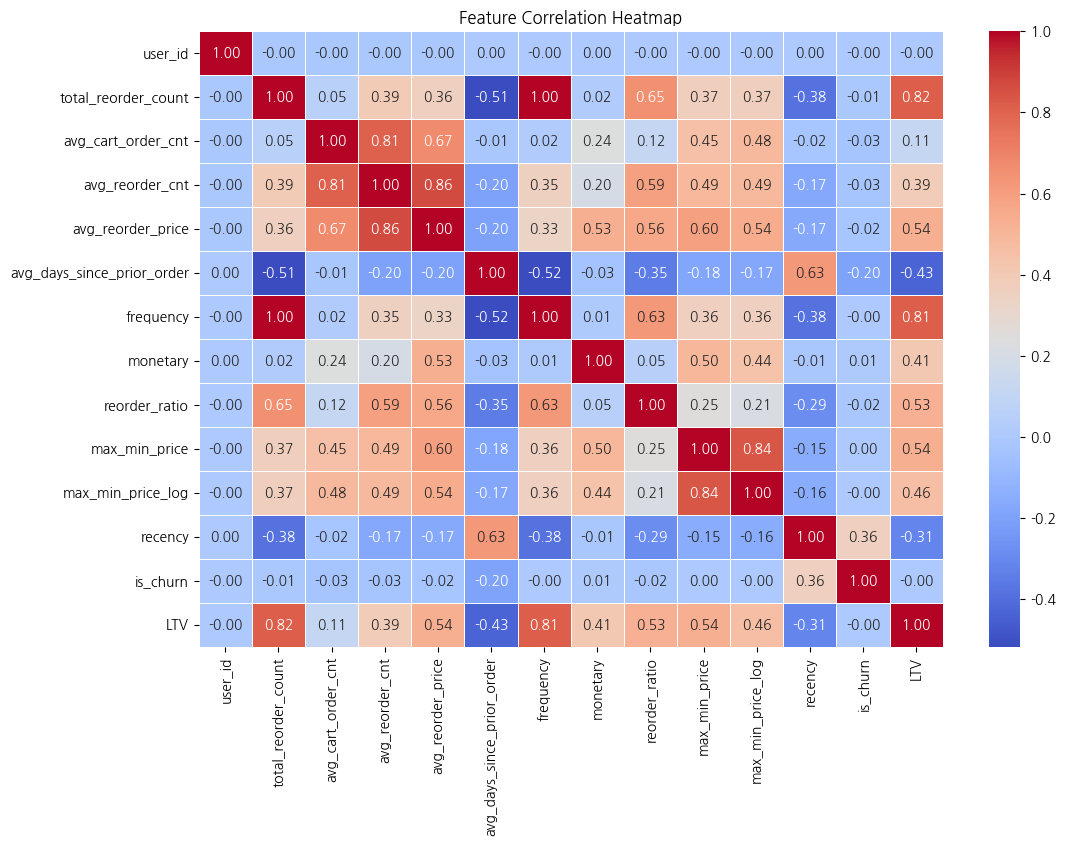

In [7]:
#Ï†ÑÏ≤¥ Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ïà´ÏûêÌòï Î≥ÄÏàòÎßå ÏÑ†ÌÉù
numeric_cols = users_f.select_dtypes(include=['float64', 'int64']).columns

# ÏÉÅÍ¥Ä ÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = users_f[numeric_cols].corr()

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Î≥ÄÏàòÏÑ†ÌÉù Í∏∞Ï§Ä
1. Ï†ÑÏ≤¥Î≥ÄÏàòÏóêÏÑú Í±∞Ïùò Í∞ôÏùÄ Í∏∞Ï§ÄÏúºÎ°ú ÎßåÎì§Ïñ¥ÏßÑÍ±∞ Ï†úÏô∏
2. ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÎÜíÏùÄ Í≤ÉÎì§Ï§ë ÌïòÎÇò Ï†úÏô∏
3. ÎùºÏÜå, Î¶øÏßÄ , Elasticnet, Mutual Information Ïã§ÌñâÌï¥ÏÑú Ï†ÅÏ†ïÌïú Í∞ØÏàò (3~5Í∞ú) ÏÑ†ÌÉù

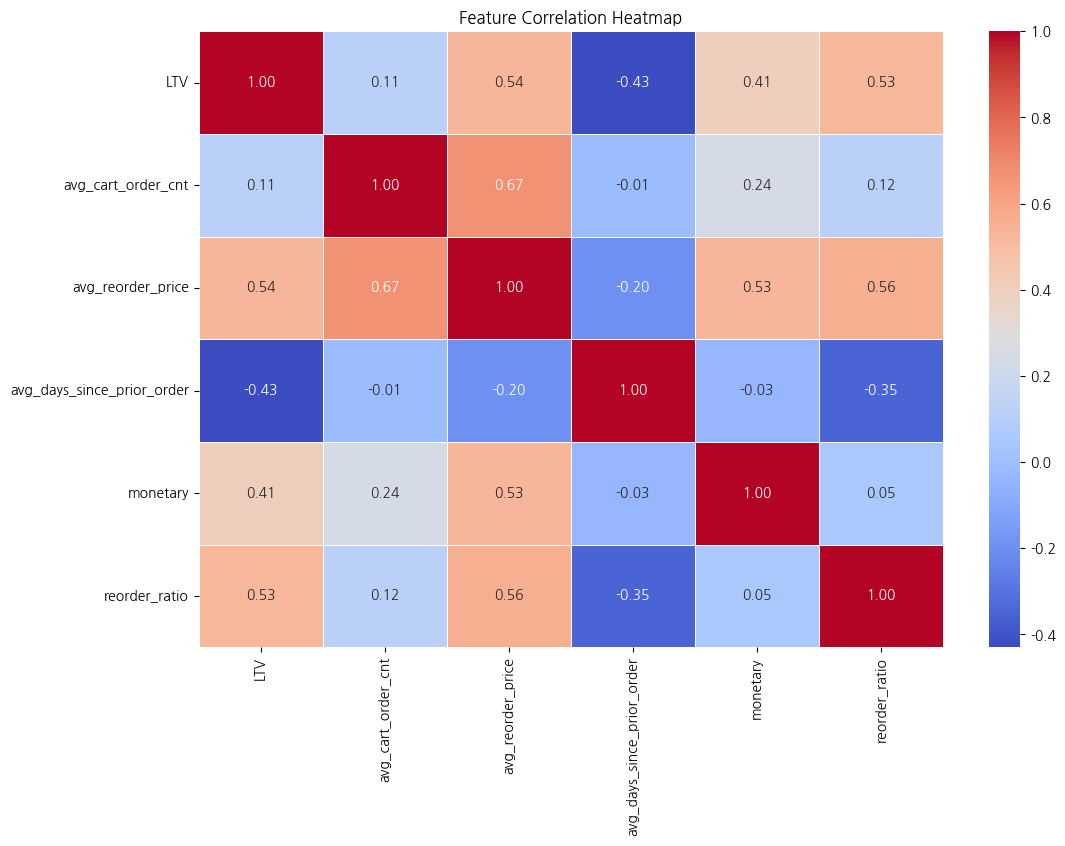

In [8]:
# ÏµúÏ¢Ö ÏÑ†ÌÉù Î≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù

selected_features = ["LTV",
     "avg_cart_order_cnt", "avg_reorder_price",
    "avg_days_since_prior_order", "monetary", "reorder_ratio"
]

# ÏÉÅÍ¥Ä ÌñâÎ†¨ Í≥ÑÏÇ∞
corr_matrix = users_f[selected_features].corr()

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from yellowbrick.cluster import KElbowVisualizer

# Feature Selection ÎåÄÏÉÅ Î≥ÄÏàò
selected_features = ["LTV",
     "avg_cart_order_cnt", "avg_reorder_price",
    "avg_days_since_prior_order", "monetary", "reorder_ratio"
]

# Feature & Target Î∂ÑÎ¶¨
X = users_f[selected_features]
y = users_f["LTV"]

# Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso ÌöåÍ∑ÄÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ï§ëÏöî Feature ÏÑ†ÌÉù
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)
important_features = np.array(selected_features)[lasso.coef_ != 0]

print("ÏÑ†ÌÉùÎêú Ï£ºÏöî Î≥ÄÏàò:", important_features)

ÏÑ†ÌÉùÎêú Ï£ºÏöî Î≥ÄÏàò: ['LTV']


In [10]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv=5).fit(X_scaled, y)
print("Ridge Í∞ÄÏ§ëÏπò:", ridge.coef_)

Ridge Í∞ÄÏ§ëÏπò: [ 5.25854210e+03 -1.12307057e-03  1.85463557e-03 -1.39473234e-03
  1.29030507e-03  1.31633247e-03]


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_df = pd.DataFrame(X_scaled, columns=selected_features)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data)

                      Feature       VIF
0                         LTV  2.054805
1          avg_cart_order_cnt  2.759073
2           avg_reorder_price  6.069435
3  avg_days_since_prior_order  1.286619
4                    monetary  2.052860
5               reorder_ratio  2.611982


In [12]:
lasso = LassoCV(cv=5, alphas=np.logspace(-4,1,100), random_state=42).fit(X_scaled, y)
selected_features_lasso = np.array(selected_features)[lasso.coef_ != 0]
print("Lasso ÏÑ†ÌÉùÎêú Ï£ºÏöî Î≥ÄÏàò:", selected_features_lasso)

Lasso ÏÑ†ÌÉùÎêú Ï£ºÏöî Î≥ÄÏàò: ['LTV']


In [13]:
from sklearn.linear_model import ElasticNetCV

elastic = ElasticNetCV(cv=5, l1_ratio=0.5, random_state=42).fit(X_scaled, y)
selected_features_elastic = np.array(selected_features)[elastic.coef_ != 0]
print("ElasticNet ÏÑ†ÌÉùÎêú Ï£ºÏöî Î≥ÄÏàò:", selected_features_elastic)

ElasticNet ÏÑ†ÌÉùÎêú Ï£ºÏöî Î≥ÄÏàò: ['LTV' 'avg_cart_order_cnt' 'avg_reorder_price'
 'avg_days_since_prior_order' 'monetary' 'reorder_ratio']


In [14]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X_scaled, y)
selected_features_mi = np.array(selected_features)[mi_scores > np.median(mi_scores)]
print("Mutual Information ÏÑ†ÌÉùÎêú Ï£ºÏöî Î≥ÄÏàò:", selected_features_mi)

Mutual Information ÏÑ†ÌÉùÎêú Ï£ºÏöî Î≥ÄÏàò: ['LTV' 'monetary' 'reorder_ratio']


## K-means

Mutual Information ÏÑ†ÌÉùÎêú Ï£ºÏöî Î≥ÄÏàò: ['LTV' 'monetary' 'reorder_ratio']
-> ÏµúÏ¢Ö ÌîºÏ≥êÎ°ú ÏÑ†ÌÉù

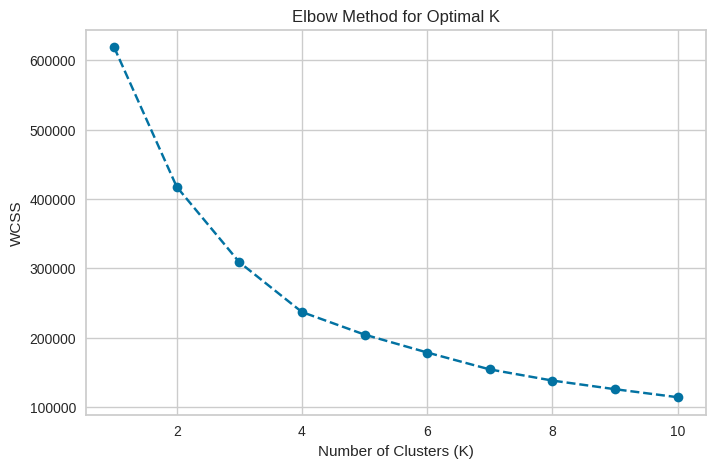

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎßå ÏÇ¨Ïö©
selected_features_mi = ["LTV", "monetary", "reorder_ratio"]
X_selected = users_f[selected_features_mi]  # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎßå ÏÇ¨Ïö©

# Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ (K-MeansÎäî Ïä§ÏºÄÏùºÎßÅ ÌïÑÏàò)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# ÏµúÏ†ÅÏùò K Ï∞æÍ∏∞ (Elbow Method)
wcss = []
K_range = range(1, 11)  # 1~10Í∞úÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏãúÎèÑ

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Í¥ÄÏÑ±(WCSS, Within-Cluster Sum of Squares) Ï†ÄÏû•

# Elbow Method ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [16]:
import numpy as np

# WCSS Î≥ÄÌôîÎüâ Í≥ÑÏÇ∞ (Í∏∞Ïö∏Í∏∞ Ï∞®Ïù¥)
wcss_diff = np.diff(wcss)
wcss_diff_ratio = wcss_diff[:-1] / wcss_diff[1:]  # Î≥ÄÌôîÏú® Í≥ÑÏÇ∞

# Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÏú® Ï∂úÎ†•
for k, change in zip(range(2, len(wcss_diff_ratio) + 2), wcss_diff_ratio):
    print(f"K={k}, Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÏú®: {change:.2f}")

K=2, Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÏú®: 1.85
K=3, Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÏú®: 1.51
K=4, Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÏú®: 2.21
K=5, Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÏú®: 1.26
K=6, Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÏú®: 1.06
K=7, Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÏú®: 1.52
K=8, Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÏú®: 1.29
K=9, Í∏∞Ïö∏Í∏∞ Î≥ÄÌôîÏú®: 1.08


                  LTV    monetary  reorder_ratio
Cluster                                         
0         3804.513481   33.374340       0.567683
1        16187.316385  153.103148       0.399391
2        14329.310681   41.536842       0.728308
3         1591.915256   31.493500       0.256781


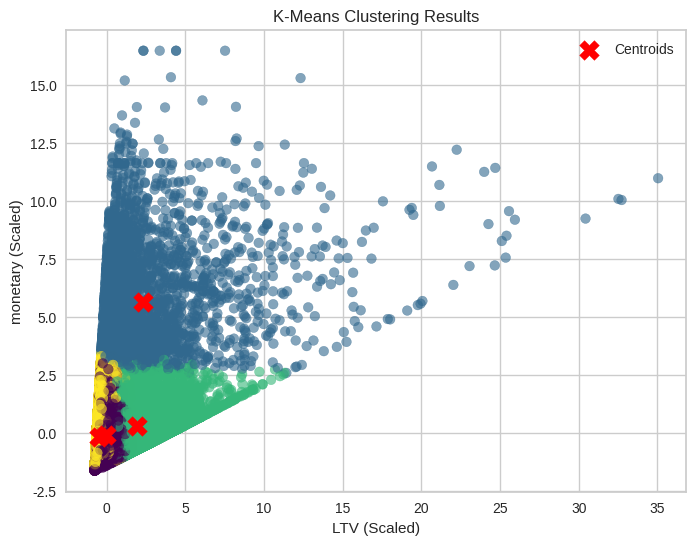

In [17]:
# ÏµúÏ†Å KÍ∞í ÏÑ§Ï†ï (Elbow Method Í≤∞Í≥º Í∏∞Î∞òÏúºÎ°ú)
optimal_k = 4

# K-Means Î™®Îç∏ ÌïôÏäµ
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)  # ÌÅ¥Îü¨Ïä§ÌÑ∞ Ìï†Îãπ

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_clusters = users_f[['user_id']].copy() # Ï∂îÍ∞ÄÏΩîÎìú
# df_clusters = pd.DataFrame(X_selected)  # ÏõêÎ≥∏ Ïä§ÏºÄÏùº Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
df_clusters = df_clusters.assign(LTV=X_selected['LTV'],
                                 monetary=X_selected['monetary'],
                                 reorder_ratio=X_selected['reorder_ratio'],
                                 Cluster=clusters)  # ÏõêÎ≥∏ Î≥ÄÏàòÏôÄ ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï∂îÍ∞Ä
df_clusters["Cluster"] = clusters  # ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï∂îÍ∞Ä

# # ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†Í∞í ÌôïÏù∏
# print(df_clusters.groupby("Cluster").mean())

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑†Í∞í ÌôïÏù∏ (user_id Ï†úÏô∏)
df_cluster_summary = users_f[selected_features_mi].copy()
df_cluster_summary["Cluster"] = clusters
print(df_cluster_summary.groupby("Cluster").mean())

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÏãúÍ∞ÅÌôî (2D)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel("LTV (Scaled)")
plt.ylabel("monetary (Scaled)")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

In [18]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∞úÏàò Î∞è ÎπÑÏú® Í≥ÑÏÇ∞
cluster_counts = df_clusters["Cluster"].value_counts()
total_count = len(df_clusters)

# ÎπÑÏú® Í≥ÑÏÇ∞
cluster_ratios = cluster_counts / total_count * 100  # ÌçºÏÑºÌä∏ ÎπÑÏú® Í≥ÑÏÇ∞

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
df_cluster_summary = pd.DataFrame({
    "Cluster": cluster_counts.index,
    "Count": cluster_counts.values,
    "Ratio (%)": cluster_ratios.values
})

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ïÎ†¨
df_cluster_summary = df_cluster_summary.sort_values(by="Cluster").reset_index(drop=True)

# Í≤∞Í≥º Ï∂úÎ†•
print(df_cluster_summary)

   Cluster  Count  Ratio (%)
0        0  89114  43.215379
1        1   3233   1.567827
2        2  22285  10.806997
3        3  91577  44.409798


In [19]:
import numpy as np
from sklearn.metrics import silhouette_score

# 10,000Í∞ú Ïù¥Ìïò ÏÉòÌîåÎ°ú Ï†úÌïú
num_samples = min(10000, X_scaled.shape[0])  # 10,000Í∞úÍπåÏßÄÎßå ÏÇ¨Ïö©
sample_indices = np.random.choice(X_scaled.shape[0], num_samples, replace=False)
X_sample = X_scaled[sample_indices]
clusters_sample = np.array(clusters)[sample_indices]

# ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú Silhouette Score Í≥ÑÏÇ∞
silhouette_avg = silhouette_score(X_sample, clusters_sample)
print(f"Silhouette Score (ÏÉòÌîåÎßÅ Ï†ÅÏö©): {silhouette_avg:.4f}")

Silhouette Score (ÏÉòÌîåÎßÅ Ï†ÅÏö©): 0.3610


In [20]:
 import numpy as np
from sklearn.metrics import silhouette_score

num_repeats = 5  # 5Î≤à Î∞òÎ≥µ
num_samples = min(10000, X_scaled.shape[0])  # ÏÉòÌîå Í∞úÏàò Ï†úÌïú

silhouette_scores = []

for _ in range(num_repeats):
    sample_indices = np.random.choice(X_scaled.shape[0], num_samples, replace=False)
    X_sample = X_scaled[sample_indices]
    clusters_sample = np.array(clusters)[sample_indices]

    score = silhouette_score(X_sample, clusters_sample)
    silhouette_scores.append(score)

# ÌèâÍ∑†Í∞í Ï∂úÎ†•
silhouette_mean = np.mean(silhouette_scores)
silhouette_std = np.std(silhouette_scores)

print(f"Silhouette Score (Î∞òÎ≥µ ÏÉòÌîåÎßÅ ÌèâÍ∑†): {silhouette_mean:.4f} ¬± {silhouette_std:.4f}")

Silhouette Score (Î∞òÎ≥µ ÏÉòÌîåÎßÅ ÌèâÍ∑†): 0.3614 ¬± 0.0032


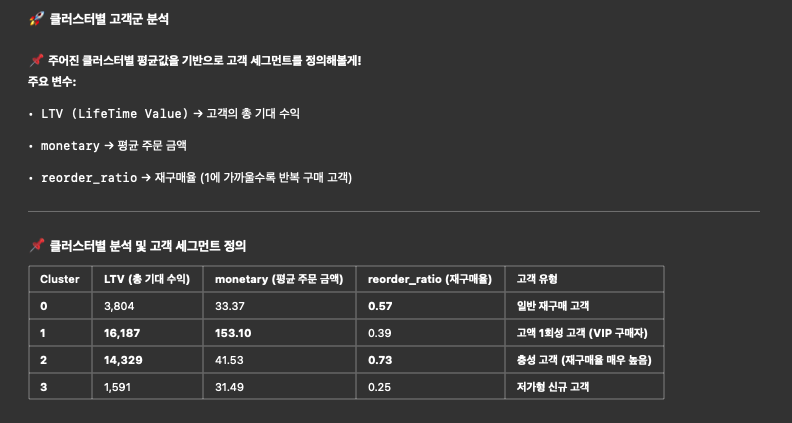

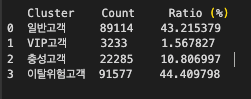

üî• Í≤∞Î°†  
	‚Ä¢	**Cluster 2 (Ï∂©ÏÑ± Í≥†Í∞ù)**Ïù¥ Í∞ÄÏû• Ï§ëÏöîÌïú Í≥†Í∞ù ‚Üí VIP ÌòúÌÉù Ï†úÍ≥µ & Ïú†ÏßÄ Ï†ÑÎûµ ÌïÑÏöî  
	‚Ä¢	Cluster 1 (Í≥†Ïï° 1ÌöåÏÑ± Í≥†Í∞ù) ‚Üí Ïû¨Íµ¨Îß§ Ïú†ÎèÑ Ï†ÑÎûµÏù¥ ÌïÑÏöî (ÌîÑÎ¶¨ÎØ∏ÏóÑ ÌòúÌÉù Ï†úÍ≥µ)  
	‚Ä¢	Cluster 3 (Ï†ÄÍ∞ÄÌòï Ïã†Í∑ú Í≥†Í∞ù) ‚Üí Ï≤´ Íµ¨Îß§ ÌõÑ Ïù¥ÌÉà Î∞©ÏßÄ Ï†ÑÎûµ (Ïø†Ìè∞, Í∞úÏù∏Ìôî ÎßàÏºÄÌåÖ)  
	‚Ä¢	Cluster 0 (ÏùºÎ∞ò Ïû¨Íµ¨Îß§ Í≥†Í∞ù) ‚Üí Íµ¨ÎèÖÌòï ÏÑúÎπÑÏä§ Ïú†ÎèÑ Í∞ÄÎä• (Î¶¨ÌÖêÏÖò ÎßàÏºÄÌåÖ Í∞ïÌôî)


In [21]:
df_clusters

user_id           LTV   monetary  reorder_ratio  Cluster
0             1   1319.599181  16.638182       0.728571        0
1             2   4412.121386  40.797333       0.464602        0
2             3   3456.161752  39.950833       0.625000        0
3             4   2707.470893  75.114000       0.055556        3
4             5   1150.251580  31.908000       0.391304        3
...         ...           ...        ...            ...      ...
206204   206205   1739.760021  60.330000       0.274510        3
206205   206206  11578.141870  23.968209       0.473684        2
206206   206207   4038.388751  35.010000       0.587444        0
206207   206208  12512.401364  35.420204       0.707533        2
206208   206209   2948.191045  29.212857       0.474453        0

[206209 rows x 5 columns]

In [22]:
cluster_id = df_clusters.drop(['LTV',	'monetary',	'reorder_ratio'],axis=1)
cluster_id

user_id  Cluster
0             1        0
1             2        0
2             3        0
3             4        3
4             5        3
...         ...      ...
206204   206205        3
206205   206206        2
206206   206207        0
206207   206208        2
206208   206209        0

[206209 rows x 2 columns]

In [23]:
# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ `users_f`ÏôÄ `df_clusters`Î•º `user_id` Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
c_users = users_f.merge(cluster_id, on='user_id', how='left')
c_users.head()

user_id  total_reorder_count  avg_cart_order_cnt  avg_reorder_cnt  \
0        1                   10            6.363636         4.636364   
1        2                   13           15.066667         7.000000   
2        3                   11            7.333333         4.583333   
3        4                    1            3.600000         0.200000   
4        5                    4            9.200000         3.600000   

   avg_reorder_price  avg_days_since_prior_order  frequency   monetary  \
0          38.622727                   17.272727         11  16.638182   
1          92.113333                   15.200000         15  40.797333   
2          69.029167                   11.083333         12  39.950833   
3           3.518000                   11.000000          5  75.114000   
4          54.768000                    9.200000          5  31.908000   

   reorder_ratio  max_min_price  max_min_price_log  recency  is_churn  \
0       0.728571          74.87           4.329021     14.0         0   
1       0.464602         330.77           5.804442     30.0         0   
2       0.625000         144.32           4.978938     15.0         0   
3       0.055556         169.76           5.140259      0.0         0   
4       0.391304          74.13           4.319220      6.0         0   

           LTV  Cluster  
0  1319.599181        0  
1  4412.121386        0  
2  3456.161752        0  
3  2707.470893        3  
4  1150.251580        3

In [24]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∞úÏàò Í≥ÑÏÇ∞
cluster_counts = c_users['Cluster'].value_counts()

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
total_count = len(c_users)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎπÑÏú® Í≥ÑÏÇ∞
cluster_ratios = cluster_counts / total_count

# Í≤∞Í≥º Ï∂úÎ†•
print(cluster_ratios)

Cluster
3    0.444098
0    0.432154
2    0.108070
1    0.015678
Name: count, dtype: float64


## DBSCAN (Ïã§Ìñâ Ï£ºÏùò)

In [ ]:
# ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎßå ÏÇ¨Ïö©
selected_features_mi = ["LTV", "monetary", "reorder_ratio"]
X_selected = users_f[selected_features_mi]  # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎßå ÏÇ¨Ïö©

In [ ]:
# # Î∂ÑÌè¨ Ï∞®Ïù¥Î•º Ï§ÑÏù¥Í≥† Îç∞Ïù¥ÌÑ∞ Î∞ÄÏßëÏùÑ Î∂ÑÏÇ∞ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ log ÏÇ¨Ïö©
# import numpy as np
# X_selected["LTV_log"] = np.log1p(X_selected["LTV"])  # log(1 + x) Î≥ÄÌôò
# X_selected["monetary_log"] = np.log1p(X_selected["monetary"])


In [ ]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled_minmax = scaler.fit_transform(X_selected)

1. Í∏∞Î≥∏

Cluster
-1    159896
 0     46068
 1       145
 2       100
Name: count, dtype: int64


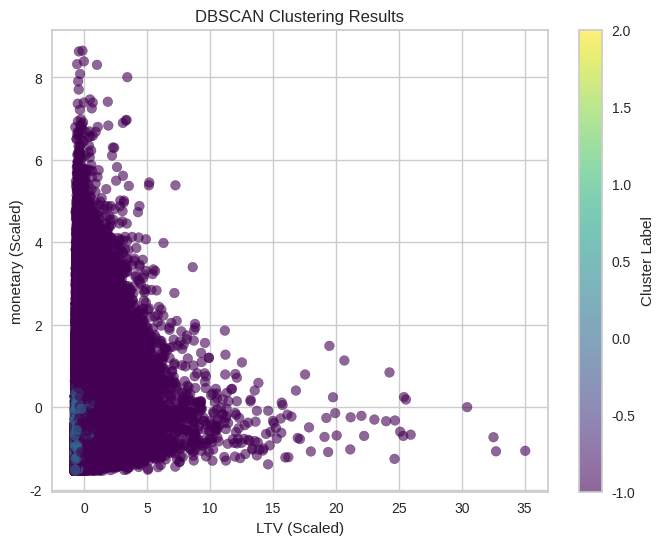

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# DBSCAN Ïã§Ìñâ (Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞)
dbscan = DBSCAN(eps=0.3, min_samples=100)  # epsÏôÄ min_samplesÎäî Ïù¥ÌõÑ ÌäúÎãù Í∞ÄÎä•
clusters = dbscan.fit_predict(X_scaled)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º Ï†ÄÏû•
df_clusters_dbscan = pd.DataFrame(X_selected)
df_clusters_dbscan["Cluster"] = clusters

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îç∞Ïù¥ÌÑ∞ Ïàò ÌôïÏù∏
print(df_clusters_dbscan["Cluster"].value_counts())

# ÏãúÍ∞ÅÌôî (2D)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel("LTV (Scaled)")
plt.ylabel("monetary (Scaled)")
plt.title("DBSCAN Clustering Results")
plt.colorbar(label="Cluster Label")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

# ÏÉòÌîåÎßÅ ÎπÑÏú® ÏÑ§Ï†ï (Ïòà: 10% ÏÉòÌîåÎßÅ)
sample_ratio = 0.1
n_samples = int(len(X_scaled) * sample_ratio)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Ìï†ÎãπÎêú Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ (ÎÖ∏Ïù¥Ï¶à Ìè¨Ïù∏Ìä∏ Ï†úÏô∏)
mask = clusters != -1
X_filtered = X_scaled[mask]
clusters_filtered = clusters[mask]

# Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÎßÅ (ÎûúÎç§ ÏÉòÌîåÎßÅ)
if len(X_filtered) > n_samples:
    sample_indices = np.random.choice(len(X_filtered), n_samples, replace=False)
    X_sampled = X_filtered[sample_indices]
    clusters_sampled = clusters_filtered[sample_indices]
else:
    X_sampled = X_filtered
    clusters_sampled = clusters_filtered

# Ïã§Î£®Ïó£ Í≥ÑÏàò Í≥ÑÏÇ∞
if len(set(clusters_sampled)) > 1:  # ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä 2Í∞ú Ïù¥ÏÉÅÏù¥Ïñ¥Ïïº Í≥ÑÏÇ∞ Í∞ÄÎä•
    silhouette_avg = silhouette_score(X_sampled, clusters_sampled)
    print(f"ÏÉòÌîåÎßÅÎêú DBSCAN Ïã§Î£®Ïó£ Í≥ÑÏàò: {silhouette_avg:.4f}")
else:
    print("Ïú†Ìö®Ìïú ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Î∂ÄÏ°±ÌïòÏó¨ Ïã§Î£®Ïó£ Í≥ÑÏàòÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

ÏÉòÌîåÎßÅÎêú DBSCAN Ïã§Î£®Ïó£ Í≥ÑÏàò: 0.3613


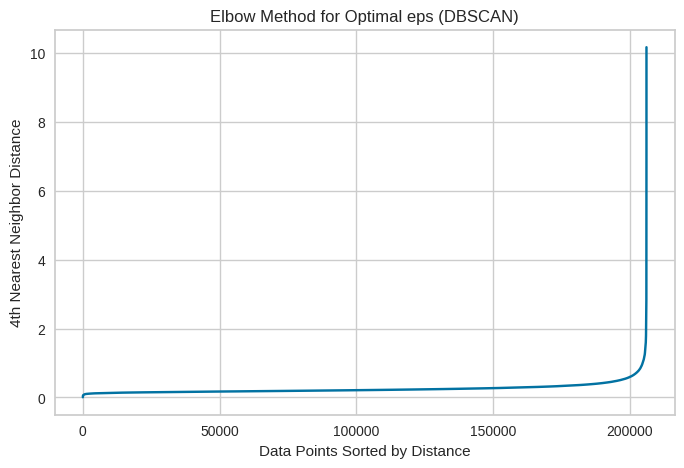

In [ ]:
from sklearn.neighbors import NearestNeighbors

# 4Î≤àÏß∏ Ïù¥ÏõÉ(k=4) Í±∞Î¶¨ Í≥ÑÏÇ∞ (min_samples=5ÎùºÎ©¥ k=4Í∞Ä Ï†ÅÏ†àÌï®)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Í±∞Î¶¨ Ï†ïÎ†¨ ÌõÑ ÌîåÎ°Ø
distances = np.sort(distances[:, 3])  # 4Î≤àÏß∏ Ïù¥ÏõÉ Í±∞Î¶¨ Ï†ïÎ†¨
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("Elbow Method for Optimal eps (DBSCAN)")
plt.show()

DBSCAN Ïûò ÏïàÎêòÎäî ÏõêÏù∏ -> Î∞ÄÎèÑ Î∂ÑÌè¨ ÎïåÎ¨∏Ïóê

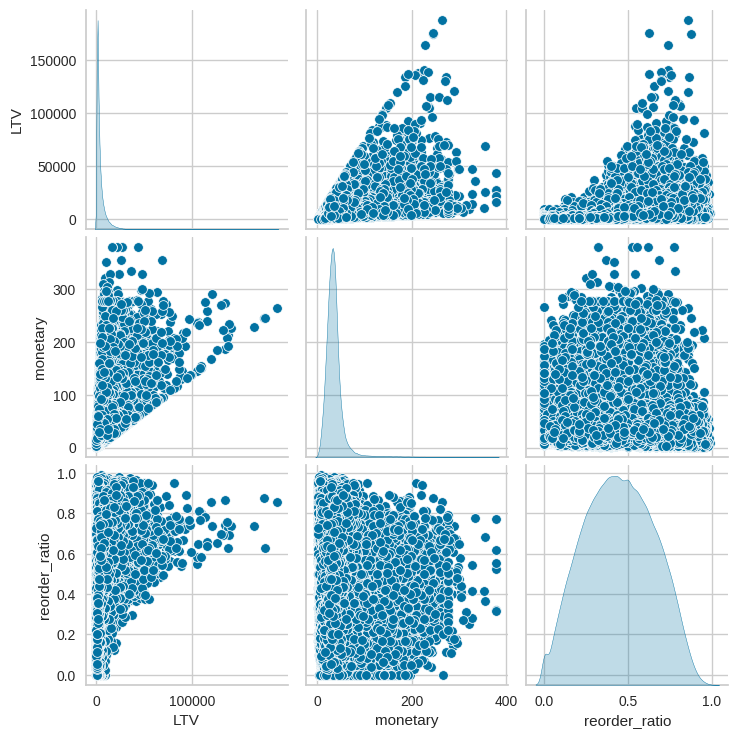

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(pd.DataFrame(X_selected, columns=selected_features_mi), diag_kind='kde')
plt.show()

üöÄ Í≤∞Î°†: K-MeansÍ∞Ä Îçî Ï†ÅÏ†àÌïú Ïù¥Ïú†

‚úÖ LTV, monetaryÍ∞Ä ÌäπÏ†ï Íµ¨Í∞ÑÏóê Î™∞Î†§ ÏûàÍ≥† ÏùºÎ∂Ä Í∑πÎã®Í∞íÏù¥ ÏûàÏùå.  
‚úÖ DBSCANÏùÄ Î∞ÄÎèÑ Ï∞®Ïù¥Î•º Í∏∞Î∞òÏúºÎ°ú ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º Ï∞æÎäîÎç∞, ÌòÑÏû¨ Îç∞Ïù¥ÌÑ∞Îäî Î∞ÄÎèÑÍ∞Ä Í∑†ÏùºÌï¥ÏÑú
  DBSCANÏù¥ Ï†ÅÏ†àÌïòÏßÄ ÏïäÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå.  
‚úÖ K-MeansÎäî Í±∞Î¶¨ Í∏∞Î∞ò ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏù¥Îùº, Ïù¥Îü∞ Î∂ÑÌè¨ÏóêÏÑúÎèÑ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏûëÎèôÌï† Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº.  

## ÏÇ¨ÌõÑÎ∂ÑÏÑù

Ï£ºÏùò! DBSCAÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÌïúÍ±∞ ÎßêÍ≥† k-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÎ°ú Î∂ÑÏÑùÌï¥ÏïºÌï®   
DBSCAN ÌååÌä∏ Ïã§ÌñâÌïòÏßÄ ÏïäÍ∏∞

In [25]:
c_users.head()

user_id  total_reorder_count  avg_cart_order_cnt  avg_reorder_cnt  \
0        1                   10            6.363636         4.636364   
1        2                   13           15.066667         7.000000   
2        3                   11            7.333333         4.583333   
3        4                    1            3.600000         0.200000   
4        5                    4            9.200000         3.600000   

   avg_reorder_price  avg_days_since_prior_order  frequency   monetary  \
0          38.622727                   17.272727         11  16.638182   
1          92.113333                   15.200000         15  40.797333   
2          69.029167                   11.083333         12  39.950833   
3           3.518000                   11.000000          5  75.114000   
4          54.768000                    9.200000          5  31.908000   

   reorder_ratio  max_min_price  max_min_price_log  recency  is_churn  \
0       0.728571          74.87           4.329021     14.0         0   
1       0.464602         330.77           5.804442     30.0         0   
2       0.625000         144.32           4.978938     15.0         0   
3       0.055556         169.76           5.140259      0.0         0   
4       0.391304          74.13           4.319220      6.0         0   

           LTV  Cluster  
0  1319.599181        0  
1  4412.121386        0  
2  3456.161752        0  
3  2707.470893        3  
4  1150.251580        3

#### USER ÌÖåÏù¥Î∏î Ïª¨Îüº Ìï¥ÏÑù
user_id	: ÏÇ¨Ïö©Ïûê ID  
total_reorder_count	: Ï¥ù Ïû¨Íµ¨Îß§ Î∞úÏÉù ÌöüÏàò  
avg_cart_order_cnt	: ÌèâÍ∑† Ïû•Î∞îÍµ¨Îãà ÌÅ¨Í∏∞ (ÌíàÎ™© Ïàò)  
avg_reorder_cnt	: ÌèâÍ∑† Ïû¨Íµ¨Îß§ ÌíàÎ™© Ïàò  
avg_reorder_price	: ÌèâÍ∑† Ïû¨Íµ¨Îß§ Í∞ÄÍ≤©  
avg_days_since_prior_order :	ÌèâÍ∑† Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞ (Ïù¥Ï†Ñ Ï£ºÎ¨∏ ÌõÑ ÌèâÍ∑† Í≤ΩÍ≥º ÏùºÏàò)  
recency	: Í∞ÄÏû• ÏµúÍ∑º Íµ¨Îß§ Ïù¥ÌõÑ ÏßÄÎÇú ÏùºÏàò  
frequency	: Ï¥ù Ï£ºÎ¨∏ ÌöüÏàò    
monetary	: ÌèâÍ∑† Íµ¨Îß§ Í∞ÄÍ≤© (Í±∞Îûò Í∏àÏï°)  
reorder_ratio : Ïû¨Ï£ºÎ¨∏ÎπÑÏú®  
max_min_price : ÏµúÎåÄ - ÏµúÏÜåÍ∏àÏï°  
recency : ÏµúÍ∑ºÏÑ±  
is_churn : Ïù¥ÌÉàÏó¨Î∂Ä  
LTV: Í≥†Í∞ùÎ≥Ñ Ï¥ùÍµ¨Îß§Î†•


In [26]:
cluster_ratios = c_users["Cluster"].value_counts(normalize=True) * 100
cluster_ratios

Cluster
3    44.409798
0    43.215379
2    10.806997
1     1.567827
Name: proportion, dtype: float64

In [29]:
# is_reorder Ïª¨Îüº Îß§Ìïë
reorder_mapping = {
    0: 'Ïú†ÏßÄ',
    1: 'Ïù¥ÌÉà'
}
c_users['is_churn'] = c_users['is_churn'].map(reorder_mapping)

# Cluster Ïª¨Îüº Îß§Ìïë
cluster_mapping = {
    0: 'ÏùºÎ∞òÍ≥†Í∞ù',
    1: 'VIP',
    2: 'Ï∂©ÏÑ±Í≥†Í∞ù',
    3: 'Ïù¥ÌÉàÏúÑÌóòÍ≥†Í∞ù'
}
c_users['cluster'] = c_users['Cluster'].map(cluster_mapping)

# Î∂àÌïÑÏöîÌïú ÏõêÎ≥∏ Ïª¨Îüº ÏÇ≠Ï†ú (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
c_users.drop(columns=['Cluster'], inplace=True)
c_users.head()


user_id  total_reorder_count  avg_cart_order_cnt  avg_reorder_cnt  \
0        1                   10            6.363636         4.636364   
1        2                   13           15.066667         7.000000   
2        3                   11            7.333333         4.583333   
3        4                    1            3.600000         0.200000   
4        5                    4            9.200000         3.600000   

   avg_reorder_price  avg_days_since_prior_order  frequency   monetary  \
0          38.622727                   17.272727         11  16.638182   
1          92.113333                   15.200000         15  40.797333   
2          69.029167                   11.083333         12  39.950833   
3           3.518000                   11.000000          5  75.114000   
4          54.768000                    9.200000          5  31.908000   

   reorder_ratio  max_min_price  max_min_price_log  recency is_churn  \
0       0.728571          74.87           4.329021     14.0       Ïú†ÏßÄ   
1       0.464602         330.77           5.804442     30.0       Ïú†ÏßÄ   
2       0.625000         144.32           4.978938     15.0       Ïú†ÏßÄ   
3       0.055556         169.76           5.140259      0.0       Ïú†ÏßÄ   
4       0.391304          74.13           4.319220      6.0       Ïú†ÏßÄ   

           LTV cluster  
0  1319.599181    ÏùºÎ∞òÍ≥†Í∞ù  
1  4412.121386    ÏùºÎ∞òÍ≥†Í∞ù  
2  3456.161752    ÏùºÎ∞òÍ≥†Í∞ù  
3  2707.470893  Ïù¥ÌÉàÏúÑÌóòÍ≥†Í∞ù  
4  1150.251580  Ïù¥ÌÉàÏúÑÌóòÍ≥†Í∞ù

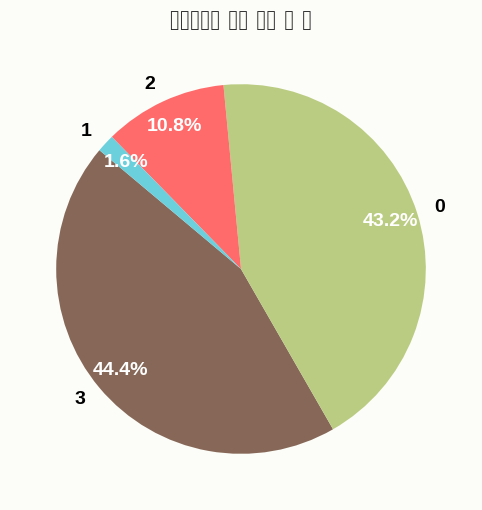

In [30]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í≥†Í∞ù ÏàòÏôÄ ÎπÑÏú®
import pandas as pd
import matplotlib.pyplot as plt

# ÏÉâÏÉÅ ÏßÄÏ†ï
colors = ["#876858", "#bacc81", "#ff6b6b", "#6bcfdc", "#c2c2f0", "#ffb3e6"]

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
fig, ax = plt.subplots(figsize=(8, 6))  # ÏõêÏùÑ ÏûëÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ ÎÜíÏù¥Î•º Ï§ÑÏûÑ
fig.patch.set_facecolor("#fcfdf8")  # Ï†ÑÏ≤¥ Î∞∞Í≤ΩÏÉâ
ax.set_facecolor("#fcfdf8")  # ÌîåÎ°Ø ÏòÅÏó≠ Î∞∞Í≤ΩÏÉâ

# ÏõêÌòï Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
wedges, texts, autotexts = ax.pie(
    cluster_counts,
    labels=cluster_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    textprops={'fontsize': 14},  # ÎùºÎ≤® ÌÅ¨Í∏∞ Ï¶ùÍ∞Ä
    pctdistance=0.85  # ÌçºÏÑºÌä∏ ÌÖçÏä§Ìä∏Î•º Ïõê ÏïàÏ™ΩÏúºÎ°ú Ïù¥Îèô
)

# Ï†úÎ™© Ïä§ÌÉÄÏùº Î≥ÄÍ≤Ω
plt.title("ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í≥†Í∞ù ÎπÑÏú® Î∞è Ïàò", fontsize=20, fontweight="bold")

# ÎùºÎ≤®Í≥º ÌçºÏÑºÌä∏ ÌÖçÏä§Ìä∏ Ïä§ÌÉÄÏùº Î≥ÄÍ≤Ω
for text in texts:
    text.set(fontsize=14, color="black", fontweight="semibold")

for autotext in autotexts:
    autotext.set(fontsize=14, fontweight="bold", color="white")

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

In [31]:
f_orders = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/f_orders.csv")
f_orders.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  cart_order_cnt  reorder_cnt  total_price  \
0                     0.0               5            0        12.06   
1                    15.0               6            3        35.37   
2                    21.0               5            3        12.06   
3                    29.0               5            5        12.06   
4                    28.0               8            5        35.37   

   max_price  total_reordered_price  is_reorder  
0      42.11                   0.00           0  
1      75.12                  32.72           1  
2      39.80                  23.54           1  
3      36.71                  36.71           1  
4     106.09                  66.59           1

In [32]:
cluster_id

user_id  Cluster
0             1        0
1             2        0
2             3        0
3             4        3
4             5        3
...         ...      ...
206204   206205        3
206205   206206        2
206206   206207        0
206207   206208        2
206208   206209        0

[206209 rows x 2 columns]

product Ï†ïÎ≥¥ÌÖåÏù¥Î∏îÍ≥º Í≤∞Ìï©

In [33]:
# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ `users_f`ÏôÄ `df_clusters`Î•º `user_id` Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
c_orders = f_orders.merge(cluster_id, on='user_id', how='left')
c_orders.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  cart_order_cnt  reorder_cnt  total_price  \
0                     0.0               5            0        12.06   
1                    15.0               6            3        35.37   
2                    21.0               5            3        12.06   
3                    29.0               5            5        12.06   
4                    28.0               8            5        35.37   

   max_price  total_reordered_price  is_reorder  Cluster  
0      42.11                   0.00           0        0  
1      75.12                  32.72           1        0  
2      39.80                  23.54           1        0  
3      36.71                  36.71           1        0  
4     106.09                  66.59           1        0

In [34]:
# user_idÍ∞Ä Í∞ôÏùÄ Í≤ΩÏö∞ cluster Í∞íÎèÑ Í∞ôÏùÄÏßÄ ÌôïÏù∏
c_orders.groupby('user_id')['Cluster'].nunique().value_counts()

Cluster
1    206209
Name: count, dtype: int64

ÏÇ¨ÌõÑÎ∂ÑÏÑù

In [35]:

import pandas as pd

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ïû•Î∞îÍµ¨Îãà ÌÅ¨Í∏∞ (cart_order_cnt ÌèâÍ∑†)
avg_cart_size = c_orders.groupby("Cluster")["cart_order_cnt"].mean().reset_index()
avg_cart_size.rename(columns={"cart_order_cnt": "avg_cart_size"}, inplace=True)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∞ÄÏû• ÎßéÏù¥ Íµ¨Îß§ÌïòÎäî ÏöîÏùº
most_common_dow = c_orders.groupby("Cluster")["order_dow"].agg(lambda x: x.mode()[0]).reset_index()
most_common_dow.rename(columns={"order_dow": "most_common_order_dow"}, inplace=True)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∞ÄÏû• ÎßéÏù¥ Íµ¨Îß§ÌïòÎäî ÏãúÍ∞ÑÎåÄ
most_common_hour = c_orders.groupby("Cluster")["order_hour_of_day"].agg(lambda x: x.mode()[0]).reset_index()
most_common_hour.rename(columns={"order_hour_of_day": "most_common_order_hour"}, inplace=True)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† ÏßÄÏ∂ú Í∏àÏï° (total_price ÌèâÍ∑†)
avg_spending = c_orders.groupby("Cluster")["total_price"].mean().reset_index()
avg_spending.rename(columns={"total_price": "avg_spending"}, inplace=True)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïû¨Íµ¨Îß§ ÎπÑÏú® (reorder_cnt / cart_order_cnt)
c_orders["reorder_rate"] = c_orders["reorder_cnt"] / c_orders["cart_order_cnt"].replace(0, 1)  # 0 Î∞©ÏßÄ
reorder_ratio = c_orders.groupby("Cluster")["reorder_rate"].mean().reset_index()
reorder_ratio.rename(columns={"reorder_rate": "avg_reorder_rate"}, inplace=True)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† Ïû¨Íµ¨Îß§ Ï£ºÍ∏∞ (days_since_prior_order ÌèâÍ∑†)
reorder_cycle = c_orders.groupby("Cluster")["days_since_prior_order"].mean().reset_index()
reorder_cycle.rename(columns={"days_since_prior_order": "avg_reorder_cycle"}, inplace=True)

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ìï©ÏπòÍ∏∞
Cluster_analysis = avg_cart_size.merge(most_common_dow, on="Cluster")\
                               .merge(most_common_hour, on="Cluster")\
                               .merge(avg_spending, on="Cluster")\
                               .merge(reorder_ratio, on="Cluster")\
                               .merge(reorder_cycle, on="Cluster")

# Í≤∞Í≥º Ï∂úÎ†•
print(Cluster_analysis)


   Cluster  avg_cart_size  most_common_order_dow  most_common_order_hour  \
0        0       9.818844                      0                      10   
1        1       9.121391                      5                      15   
2        2      11.191050                      1                      10   
3        3       8.955768                      0                      15   

   avg_spending  avg_reorder_rate  avg_reorder_cycle  
0     31.429493          0.613747          11.588750  
1    150.992714          0.544426           9.699393  
2     38.781414          0.747720           6.188465  
3     30.657331          0.311053          14.519928  


In [36]:
prod = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/products.csv")
prod.head()

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [37]:
ais = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/aisles.csv")
ais.head()

aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

In [38]:
orders_products_f = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/orders_products_f.csv")

In [39]:
orders_products_f.head()

order_id  product_id  add_to_cart_order  reordered  \
0         1       49302                  1          1   
1         1       11109                  2          1   
2         1       10246                  3          0   
3         1       49683                  4          0   
4         1       43633                  5          1   

                                    product_name  aisle_id  department_id  \
0                               Bulgarian Yogurt       120             16   
1  Organic 4% Milk Fat Whole Milk Cottage Cheese       108             16   
2                          Organic Celery Hearts        83              4   
3                                 Cucumber Kirby        83              4   
4           Lightly Smoked Sardines in Olive Oil        95             15   

   price                 aisle    department  
0   4.42                yogurt    dairy eggs  
1   5.72  other creams cheeses    dairy eggs  
2   2.84      fresh vegetables       produce  
3   1.55      fresh vegetables       produce  
4  18.04   canned meat seafood  canned goods

In [40]:
c_orders.head()

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  cart_order_cnt  reorder_cnt  total_price  \
0                     0.0               5            0        12.06   
1                    15.0               6            3        35.37   
2                    21.0               5            3        12.06   
3                    29.0               5            5        12.06   
4                    28.0               8            5        35.37   

   max_price  total_reordered_price  is_reorder  Cluster  reorder_rate  
0      42.11                   0.00           0        0         0.000  
1      75.12                  32.72           1        0         0.500  
2      39.80                  23.54           1        0         0.600  
3      36.71                  36.71           1        0         1.000  
4     106.09                  66.59           1        0         0.625

In [41]:
a = c_orders[['order_id', 'user_id', 'Cluster']]

In [42]:
a.head()

order_id  user_id  Cluster
0   2539329        1        0
1   2398795        1        0
2    473747        1        0
3   2254736        1        0
4    431534        1        0

In [43]:
c_pro_orders = a.merge(orders_products_f, on='order_id', how='left')
c_pro_orders.head()

order_id  user_id  Cluster  product_id  add_to_cart_order  reordered  \
0   2539329        1        0         196                  1          0   
1   2539329        1        0       14084                  2          0   
2   2539329        1        0       12427                  3          0   
3   2539329        1        0       26088                  4          0   
4   2539329        1        0       26405                  5          0   

                              product_name  aisle_id  department_id  price  \
0                                     Soda        77              7   9.15   
1  Organic Unsweetened Vanilla Almond Milk        91             16   3.90   
2                      Original Beef Jerky        23             19  12.06   
3               Aged White Cheddar Popcorn        23             19  11.51   
4         XL Pick-A-Size Paper Towel Rolls        54             17   5.49   

             aisle  department  
0      soft drinks   beverages  
1  soy lactosefree  dairy eggs  
2    popcorn jerky      snacks  
3    popcorn jerky      snacks  
4      paper goods   household

In [44]:
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú (ÏòàÏ†úÏóêÏÑúÎäî Ïù¥ÎØ∏ DataFrameÏúºÎ°ú Ï°¥Ïû¨ÌïúÎã§Í≥† Í∞ÄÏ†ï)
# c_pro_orders = pd.read_csv('c_pro_orders.csv')  # Ïã§Ï†ú ÌååÏùºÏù¥ ÏûàÎã§Î©¥ ÏÇ¨Ïö©

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ aisle Íµ¨Îß§ Ïàò ÏßëÍ≥Ñ
cluster_aisle_counts = c_pro_orders.groupby(['Cluster', 'aisle'])['order_id'].count().reset_index()
cluster_aisle_counts = cluster_aisle_counts.rename(columns={'order_id': 'aisle_count'})

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ department Íµ¨Îß§ Ïàò ÏßëÍ≥Ñ
cluster_department_counts = c_pro_orders.groupby(['Cluster', 'department'])['order_id'].count().reset_index()
cluster_department_counts = cluster_department_counts.rename(columns={'order_id': 'department_count'})

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∞ÄÏû• ÎßéÏù¥ Íµ¨Îß§Ìïú aisle Ï∞æÍ∏∞
top_aisles = cluster_aisle_counts.loc[cluster_aisle_counts.groupby('Cluster')['aisle_count'].idxmax()]

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∞ÄÏû• ÎßéÏù¥ Íµ¨Îß§Ìïú department Ï∞æÍ∏∞
top_departments = cluster_department_counts.loc[cluster_department_counts.groupby('Cluster')['department_count'].idxmax()]

# Í≤∞Í≥º Ï∂úÎ†•
print("Top Aisles by Cluster:")
print(top_aisles)

print("\nTop Departments by Cluster:")
print(top_departments)


Top Aisles by Cluster:
     Cluster             aisle  aisle_count
50         0      fresh fruits      1536073
187        1  fresh vegetables        26215
318        2      fresh fruits      1713548
455        3  fresh vegetables       629830

Top Departments by Cluster:
    Cluster department  department_count
19        0    produce           4099339
21        1    alcohol             73522
61        2    produce           4163395
82        3    produce           1556787


Top 5 Aisles by Cluster:
    Cluster                       aisle  aisle_count
0         0                fresh fruits      1536073
1         0            fresh vegetables      1514817
2         0  packaged vegetables fruits       782245
3         0                      yogurt       665006
4         0             packaged cheese       441423
5         1            fresh vegetables        26215
6         1                fresh fruits        22573
7         1                   red wines        20848
8         1                     spirits        19697
9         1  packaged vegetables fruits        14864
10        2                fresh fruits      1713548
11        2            fresh vegetables      1397768
12        2  packaged vegetables fruits       753711
13        2                      yogurt       619609
14        2                        milk       392042
15        3            fresh vegetables       629830
16        3                fresh fruits       520467
17        3  packaged

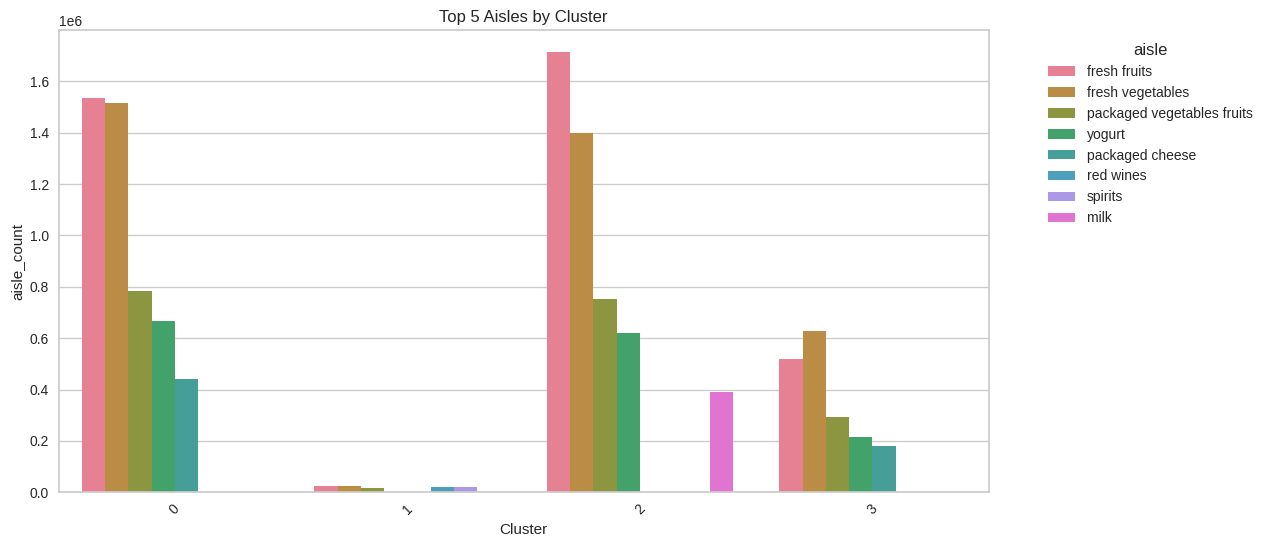

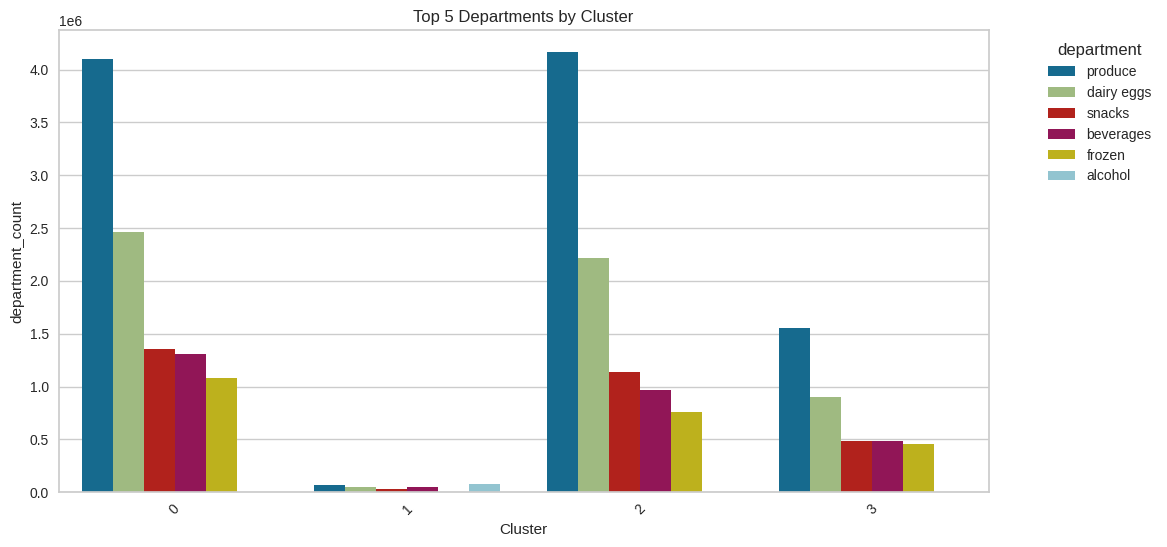

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú (ÏòàÏ†úÏóêÏÑúÎäî Ïù¥ÎØ∏ DataFrameÏúºÎ°ú Ï°¥Ïû¨ÌïúÎã§Í≥† Í∞ÄÏ†ï)
# c_pro_orders = pd.read_csv('c_pro_orders.csv')  # Ïã§Ï†ú ÌååÏùºÏù¥ ÏûàÎã§Î©¥ ÏÇ¨Ïö©

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ aisle Íµ¨Îß§ Ïàò ÏßëÍ≥Ñ
cluster_aisle_counts = c_pro_orders.groupby(['Cluster', 'aisle'])['order_id'].count().reset_index()
cluster_aisle_counts = cluster_aisle_counts.rename(columns={'order_id': 'aisle_count'})

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ department Íµ¨Îß§ Ïàò ÏßëÍ≥Ñ
cluster_department_counts = c_pro_orders.groupby(['Cluster', 'department'])['order_id'].count().reset_index()
cluster_department_counts = cluster_department_counts.rename(columns={'order_id': 'department_count'})

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ 5Í∞ú aisle Ï∞æÍ∏∞
top_aisles = cluster_aisle_counts.groupby('Cluster').apply(lambda x: x.nlargest(5, 'aisle_count')).reset_index(drop=True)

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ 5Í∞ú department Ï∞æÍ∏∞
top_departments = cluster_department_counts.groupby('Cluster').apply(lambda x: x.nlargest(5, 'department_count')).reset_index(drop=True)

# Í≤∞Í≥º Ï∂úÎ†•
print("Top 5 Aisles by Cluster:")
print(top_aisles)

print("\nTop 5 Departments by Cluster:")
print(top_departments)

# ÏãúÍ∞ÅÌôî
def plot_top_categories(df, category_col, count_col, title):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x='Cluster', y=count_col, hue=category_col, dodge=True)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(title=category_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ 5Í∞ú aisle ÏãúÍ∞ÅÌôî
plot_top_categories(top_aisles, 'aisle', 'aisle_count', 'Top 5 Aisles by Cluster')

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏúÑ 5Í∞ú department ÏãúÍ∞ÅÌôî
plot_top_categories(top_departments, 'department', 'department_count', 'Top 5 Departments by Cluster')